In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pylab as plt
%matplotlib inline
from utils import starlink_constellation


In [2]:
night_max = 366
dbfile='twilight_neo_mod2_v1.5_10yrs.db'
conn = sqlite3.connect(dbfile)
df = pd.read_sql('select observationId, sunAlt, altitude, azimuth, observationStartMJD, night,note from summaryallprops where night <= %i  order by observationId  and note="twilight_neo"' % night_max, conn)
conn.close()

In [3]:
hits = np.load('hit_scalesupersize_twilight_neo_mod2_v1.5_10yrs.npy')
df['hit'] = hits['hit']

In [4]:
sats = starlink_constellation(supersize=True, fivek=False)
print('Number of sats=%i' % len(sats))

Number of sats=47708


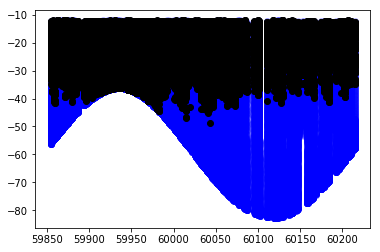

In [5]:
plt.plot(df['observationStartMJD'], df['sunAlt'], 'bo', alpha=.1)
blackout = np.where(df['hit'].values > 0)[0]
plt.plot(df['observationStartMJD'].values[blackout], df['sunAlt'].values[blackout], 'ko')

In [6]:
print('fraction of observations with hits = %f' % (blackout.size/df['hit'].values.size))

fraction of observations with hits = 0.179866


In [7]:
dt = np.where(df['sunAlt'] < -18.)[0]
dt_hit = np.where(df['hit'].values[dt] > 0)[0]
print('fraction of observations hit in non-twilight= %f' % (dt_hit.size/dt.size))

fraction of observations hit in non-twilight= 0.119951


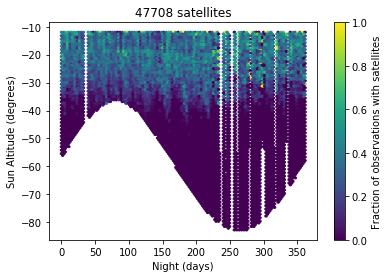

In [8]:
color = df['sunAlt']*0
color[blackout] = 1
plt.hexbin(df['observationStartMJD']-np.min(df['observationStartMJD']), df['sunAlt'], color, reduce_C_function=np.mean)
cb = plt.colorbar()
plt.xlabel('Night (days)')
plt.ylabel('Sun Altitude (degrees)')
cb.set_label('Fraction of observations with satellites')
plt.title('%i satellites' % len(sats))
plt.savefig('baseline_contam_48k.pdf')

In [9]:
# One year looking at how a 12k satellite constellation contaminates our baseline simulation. 
# White gaps are caused by downtime. Takeaway is that a large fraction of observations would have a satellite in
# the field of view until the sun gets below ~-30 degrees altitude. 

In [10]:
# Let's find an MJD in summer near midnight
df['observationStartMJD'].values[np.where((df['night']==76) & (df['sunAlt'] < -36.))]

array([ 59928.17198295,  59928.17239959,  59928.17281368,  59928.17322918,
        59928.17364457,  59928.17405998,  59928.17447407,  59928.17490028,
        59928.17531582,  59928.17573002,  59928.17614551,  59928.17656862,
        59928.17698468,  59928.17739969,  59928.17781429,  59928.1782298 ,
        59928.17864371,  59928.17905861,  59928.17947145,  59928.17988428,
        59928.18029907,  59928.18071336,  59928.18112826,  59928.18287595,
        59928.18328912,  59928.18370461,  59928.18411989,  59928.18454097,
        59928.18495992,  59928.18572362,  59928.18613882,  59928.1865554 ,
        59928.18697431,  59928.18739489,  59928.18781581,  59928.18823583,
        59928.18864925,  59928.18906824,  59928.18954023,  59928.18995926,
        59928.19038099,  59928.19079816,  59928.19121657,  59928.19162944,
        59928.19205481,  59928.19247253,  59928.19288887,  59928.19330424,
        59928.19372119,  59928.19413634,  59928.19455197,  59928.19496925,
        59928.19538664,  

In [11]:
hits.size


280342

In [12]:
in_twi = np.where((df['sunAlt'] > -18.)& (df['note'] == 'twilight_neo'))[0]

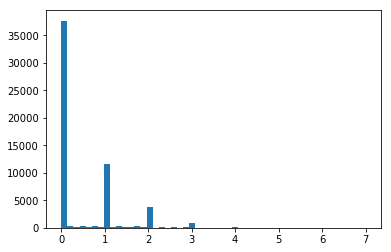

In [13]:
_ack = plt.hist(df.hit.values[in_twi], bins=50)

In [14]:
df.hit.values[in_twi].mean()

0.4770837902270243

In [15]:
multi_hit = np.where((df['sunAlt'] > -18.) & (df.hit.values > 1))[0]
multi_hit.size/in_twi.size

0.14073482705357607

In [16]:
df.altitude[in_twi].mean()

38.654893189134164

In [17]:
# For twilight and low altitude
sample = np.where((df['sunAlt'] > -18.) & (df['altitude'] < 40))[0]

In [18]:
df.hit.values[sample].mean()

0.3942263691431851

In [19]:
sample = np.where((df['sunAlt'] > -18.) & (df['note'] == 'twilight_neo'))[0]

In [20]:
df.hit.values[sample].mean()

0.4770837902270243

In [21]:
np.unique(df.hit.values[in_twi])

array([ 0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
        0.45454545,  0.54545455,  0.63636364,  0.72727273,  0.81818182,
        0.90909091,  1.        ,  1.09090909,  1.18181818,  1.27272727,
        1.36363636,  1.45454545,  1.54545455,  1.63636364,  1.72727273,
        1.81818182,  1.90909091,  2.        ,  2.09090909,  2.18181818,
        2.27272727,  2.36363636,  2.45454545,  2.54545455,  2.63636364,
        2.72727273,  2.81818182,  2.90909091,  3.        ,  3.09090909,
        3.18181818,  3.27272727,  3.36363636,  3.45454545,  3.54545455,
        3.63636364,  3.72727273,  3.81818182,  3.90909091,  4.        ,
        4.09090909,  4.18181818,  4.27272727,  4.36363636,  4.45454545,
        4.54545455,  4.63636364,  4.72727273,  4.81818182,  4.90909091,
        5.        ,  5.09090909,  5.27272727,  5.45454545,  5.63636364,
        5.81818182,  5.90909091,  6.        ,  6.18181818,  6.81818182,  7.        ])